<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

**Цель проекта**

Проанализировать данные по поведению клиентов банка в связи с ростом ежемесячного оттока для прогнозирования ухода клиентов в ближайшее время. Результаты анализа будут использованы при разработке стратегии удержания действующих клиентов.

Необходимо построить модель с предельно большим значением *F1*-меры (не менее 0.59), а также измерить метрику *AUC-ROC* и сравнить её значение с *F1*-мерой.

**Данные для анализа**

На анализ переданы исторические данные о поведении клиентов и расторжении договоров с банком.

**Шаги (план) проекта**

1.  Подготовка данных
2.  Исследование задачи
3.  Борьба с дисбалансом
4.  Тестирование модели
5.  Общий вывод

## Подготовка данных

Импортируем необходимые библиотеки для работы с данными в текущем проекте.

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
from sklearn.preprocessing import StandardScaler # импорт структуры StandardScaler из библиотеки sklearn для стандартизации данных
from sklearn.model_selection import train_test_split # импорт функции train_test_split из библиотеки sklearn для деления выборки
from sklearn.tree import DecisionTreeClassifier # импорт алгоритма "дерево решений" из библиотеки sklearn
from sklearn.ensemble import RandomForestClassifier # импорт алгоритма "случайный лес" из библиотеки sklearn
from sklearn.linear_model import LogisticRegression # импорт алгоритма "логистическая регрессия" из библиотеки sklearn
from sklearn.metrics import accuracy_score # импорт функции для расчета качества прогнозирования
from sklearn.metrics import recall_score # импорт функции для расчета полноты прогнозирования
from sklearn.metrics import precision_score # импорт функции для расчета точности прогнозирования
from sklearn.metrics import f1_score # импорт функции для расчета f1_score
from sklearn.metrics import roc_curve # импорт функции для построения ROC-кривой
from sklearn.metrics import roc_auc_score # импорт функции для подсчёта метрики AUC
import sklearn.metrics as metrics # импорт библиотеки metrics
import matplotlib.pyplot as plt # импорт библиотеки matplotlib для построения диаграмм
from sklearn.utils import shuffle # импорт функции перемешивания выборки

Откроем таблицу с данными, выведем первые 10 строк.

In [2]:
# чтение файла с данными и сохранение его в переменную df 
df = pd.read_csv('C:\\Users\\bogomolova\\Desktop\\Датасет\\Churn.csv')
# вывод первых 10 строк
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Изучим общую информацию о данных.

In [3]:
df.info() # получение общей информации о структуре датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Таблица содержит 14 столбцов, 10000 строк. 

**Переименование столбцов**

Требуется переименование всех столбцов в соответствии с правилами оформления названия столбцов "змеиным стилем" (нижний регистр, разделение слов нижним подчеркиванием).

**Типы данных**

В столбцах содержатся данные трех типов:

* 3 столбца содержат числа с плавающей запятой float64

* 8 столбцов содержат целые числа int64

* 3 столбца содержат данные object

Столбец RowNumber можно удалить, т.к. он не содержит важной информации, и вместо него могут использоваться индексы.

Также для экономии памяти требуется изменить типы данных float и int с 64 на 32.

**Пропуски**

Пропуски есть в столбце Tenure, требуется их проанализаровать и обработать.

**Дубликаты**

Требуется проверить данные на наличие явных дубликатов.

**Адекватность данных**

Требуется проверить данные в колонках на предмет адекватности и реалистичности. 




**Переименование столбцов**

Выведем на экран названия столбцов.

In [4]:
# перечень названий столбцов датасета
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Переименуем столбцы при помощи создания словаря.

In [5]:
# переименование столбцов
df = df.rename(columns = {
    'CustomerId':'customer_id', 
    'Surname':'surname', 
    'CreditScore':'credit_score',
    'Geography':'geography',
    'Gender':'gender',
    'Age':'age',
    'Tenure':'tenure',
    'Balance':'balance',
    'NumOfProducts':'num_of_products',
    'HasCrCard':'has_cr_card',
    'IsActiveMember':'is_active_member',
})

Проверим корректность переименования.

In [6]:
# перечень названий столбцов датасета
df.columns

Index(['RowNumber', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'EstimatedSalary', 'Exited'],
      dtype='object')

Переименуем оставшиеся две колонки EstimatedSalary и Exited при помощи рег. выражения.

In [7]:
import re # импорт модуля re

In [8]:
# переименование колонок при помощи рег. выражения
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower() for name in df.columns]

In [9]:
# перечень названий столбцов датасета
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Переименование прошло корректно, все колонки переименованы.

**Типы данных**

Удалим столбец 'RowNumber'.

In [10]:
# удаление столбца
df = df.drop(['row_number'], axis=1)

Проверим корректность удаления.

In [11]:
# вывод первых 5 строк датафрейма
df.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Удаление столбца прошло корректно.

Заменим типы данных 64 на 32 для экономии памяти.

In [12]:
# изменение типов данных
df[df.select_dtypes(np.int64).columns] = df.select_dtypes(np.int64).astype(np.int32)
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)

Проверим корректность изменения типов данных.

In [13]:
df.info() # получение общей информации о структуре датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int32  
 1   surname           10000 non-null  object 
 2   credit_score      10000 non-null  int32  
 3   geography         10000 non-null  object 
 4   gender            10000 non-null  object 
 5   age               10000 non-null  int32  
 6   tenure            9091 non-null   float32
 7   balance           10000 non-null  float32
 8   num_of_products   10000 non-null  int32  
 9   has_cr_card       10000 non-null  int32  
 10  is_active_member  10000 non-null  int32  
 11  estimated_salary  10000 non-null  float32
 12  exited            10000 non-null  int32  
dtypes: float32(3), int32(7), object(3)
memory usage: 625.1+ KB


Изменение типов данных проведено корректно.

**Пропуски**

Выведем на экран строки с пропусками в колонке tenure, чтобы оценить варианты заполнения пропусков.

In [14]:
df[df['tenure'].isnull()] # вывод строк с пустыми значениями в колонке

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,15589475,Azikiwe,591,Spain,Female,39,NaN,0.000000,3,1,0,140469.375000,1
48,15766205,Yin,550,Germany,Male,38,NaN,103391.382812,1,0,1,90878.132812,0
51,15768193,Trevisani,585,Germany,Male,36,NaN,146050.968750,2,0,0,86424.570312,0
53,15702298,Parkhill,655,Germany,Male,41,NaN,125561.968750,1,0,0,164040.937500,1
60,15651280,Hunter,742,Germany,Male,35,NaN,136857.000000,1,0,0,84509.570312,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,15703923,Cameron,744,Germany,Male,41,NaN,190409.343750,2,1,1,138361.484375,0
9956,15707861,Nucci,520,France,Female,46,NaN,85216.609375,1,1,0,117369.523438,1
9964,15642785,Douglas,479,France,Male,34,NaN,117593.476562,2,0,0,113308.289062,0
9985,15586914,Nepean,659,France,Male,36,NaN,123841.492188,2,1,0,96833.000000,0


Взаимосвязь с данными других колонок на первый взгляд не прослеживается, что не позволяет заполнить пропуски в tenure каким-либо достоверным вариантом. 

Поскольку данные составляют менее 10% от общего объема выборки, удалим строки с пропусками в tenure для удобства дальнейшей работы с данными.

In [15]:
# удаление строк с пропущенными значениями в колонке tenure
df = df.dropna(subset=['tenure']).reset_index(drop=True)

Проверим корректность проведенного удаления строк.

In [16]:
# вывод общей информации о датасетеи
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9091 non-null   int32  
 1   surname           9091 non-null   object 
 2   credit_score      9091 non-null   int32  
 3   geography         9091 non-null   object 
 4   gender            9091 non-null   object 
 5   age               9091 non-null   int32  
 6   tenure            9091 non-null   float32
 7   balance           9091 non-null   float32
 8   num_of_products   9091 non-null   int32  
 9   has_cr_card       9091 non-null   int32  
 10  is_active_member  9091 non-null   int32  
 11  estimated_salary  9091 non-null   float32
 12  exited            9091 non-null   int32  
dtypes: float32(3), int32(7), object(3)
memory usage: 568.3+ KB


Строки с пропусками в tenure удалены корректно, общий объем датасета сократился до 9091 строки.

**Дубликаты**

Проверим данные датафрейма на наличие явных дубликатов.

In [17]:
# подстчет строк - явных дубликатов
df.duplicated().sum()

0

Явных дубликатов нет.

**Адекватность данных**

Проверим данные в колонках на адекватность и реалистичность.

In [18]:
# вывод уникальных значений в колонке customer_id
df['customer_id'].value_counts()

15634602    1
15724663    1
15793671    1
15797900    1
15667932    1
           ..
15599078    1
15720508    1
15574122    1
15657439    1
15682355    1
Name: customer_id, Length: 9091, dtype: int64

Все уникальные идентификаторы клиента встречаются в выборке по одному разу, выглядят одинаково (8 цифр).

In [19]:
# вывод уникальных значений в колонке surname
df['surname'].value_counts()

Smith        30
Martin       27
Scott        26
Genovese     25
Yeh          25
             ..
Enticknap     1
Enemuo        1
Odell         1
Real          1
Burbidge      1
Name: surname, Length: 2787, dtype: int64

Данные по фамилиям клиентов выглядят адекватно, некоторые фамилии встречаются более 1 раза, что также является нормой.

In [20]:
# вывод уникальных значений в колонке credit_score
df['credit_score'].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 533, 553, 520, 722, 475, 490, 804, 582, 472, 465,
       556, 834, 660, 776, 829, 637, 698, 788, 601, 656, 725, 511, 614,
       687, 555, 603, 751, 581, 735, 661, 675, 738, 813, 657, 604, 519,
       664, 678, 757, 416, 665, 777, 506, 493, 750, 729, 646, 647, 808,
       524, 769, 515, 773, 814, 710, 623, 670, 622, 785, 605, 479, 685,
       562, 721, 628, 668, 828, 674, 625, 770, 758, 795, 686, 789, 589,
       461, 584, 579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539,
       706, 586, 631, 717, 683, 704, 615, 667, 484, 480, 512, 606, 597,
       778, 514, 730, 525, 715, 580, 807, 521, 759, 516, 711, 550, 618,
       643, 671, 689, 620, 676, 572, 695, 592, 694, 547, 594, 673, 610,
       767, 585, 763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771,
       681, 544, 766, 727, 557, 531, 498, 651, 791, 733, 811, 70

In [21]:
# вывод данных о кредитном рейтинге
df['credit_score'].describe().round()

count    9091.0
mean      651.0
std        96.0
min       350.0
25%       584.0
50%       652.0
75%       717.0
max       850.0
Name: credit_score, dtype: float64

Данные о кредитном рейтинге адкватны, находятся в диапазоне 350-850 единиц, среднее арифметическое 651, медиана 652.

In [22]:
# вывод уникальных значений в колонке geography
df['geography'].value_counts(normalize=True).round(3)

France     0.500
Germany    0.252
Spain      0.247
Name: geography, dtype: float64

В выборке представлены данные по клиентам 3 стран: Франции (50%), Германии (25%) и Испании (25%).

In [23]:
# вывод уникальных значений в колонке gender
df['gender'].value_counts(normalize=True).round(2)

Male      0.55
Female    0.45
Name: gender, dtype: float64

В выборке представлены данные по клиентам-мужчинам (55%) и клиентам-женщинам (45%).

In [24]:
# вывод уникальных значений в колонке age
df.groupby(['age'])['age'].count()

age
18    20
19    26
20    37
21    48
22    80
      ..
83     1
84     2
85     1
88     1
92     1
Name: age, Length: 70, dtype: int64

В выборке представлены клиенты от 18 до 92 лет.

In [25]:
# вывод уникальных значений в колонке tenure
df['tenure'].value_counts(normalize=True).round(3)

1.0     0.105
2.0     0.104
8.0     0.103
3.0     0.102
5.0     0.102
7.0     0.102
4.0     0.097
9.0     0.097
6.0     0.097
10.0    0.049
0.0     0.042
Name: tenure, dtype: float64

В выборке представлены клиенты, обслуживающиеся в банке менее года и от 1 года до 10 лет.

In [26]:
# вывод данных о балансе
df['balance'].describe().round()

count      9091.0
mean      76523.0
std       62329.0
min           0.0
25%           0.0
50%       97318.0
75%      127562.0
max      250898.0
Name: balance, dtype: float64

В выборке представлены данные по клиентам с балансами от 0 до 250 898, среднее арифметическое 76 523, медиана 97 318.

In [27]:
# вывод уникальных значений в колонке num_of_products
df['num_of_products'].value_counts(normalize=True).round(2)

1    0.51
2    0.46
3    0.03
4    0.01
Name: num_of_products, dtype: float64

В выборке представлены клиенты с количеством продуктов от 1 (51%) до 4 (1%).

In [28]:
# вывод уникальных значений в колонке has_cr_card
df['has_cr_card'].value_counts(normalize=True).round(3)

1    0.705
0    0.295
Name: has_cr_card, dtype: float64

У 70% клиентов в выборке есть кредитная карта, у 30 % ее нет.

In [29]:
# вывод уникальных значений в колонке is_active_member
df['is_active_member'].value_counts(normalize=True).round(2)

1    0.52
0    0.48
Name: is_active_member, dtype: float64

52% клиентов в выборке активно пользуются услугами банка, 48% неактивны.

In [30]:
# вывод данных о предполагаемой зарплате
df['estimated_salary'].describe().round()

count      9091.0
mean     100181.0
std       57625.0
min          12.0
25%       51228.0
50%      100240.0
75%      149567.0
max      199992.0
Name: estimated_salary, dtype: float64

Предполагаемая зпл клиентов в выборке от 12 до 199 992 денежных единиц, среднее арифметическое 100 181, медиана 100 240.

In [31]:
# вывод уникальных значений в колонке exited
df['exited'].value_counts(normalize=True).round(3)

0    0.796
1    0.204
Name: exited, dtype: float64

80% клиентов являются действующими клиентами банка, 20% клиентов перестали сотрудничать с банком.

<div style="border:solid blue 2px; padding: 20px"> 

**Вывод**  

Таблица с датафреймом открыта, данные изучены и предобработаны.

1. Изначально таблица содержала 10 000 строк и 14 столбцов; в процессе предобработки количество строк сократилось до 9091 (удалены строки с пропусками в колонке tenure), количество столбцов до 13 (удалена дублирующая индексы колонка с нумераций строк).

    
2. Явных дубликатов в данных нет.

    
3. Произведено переименование колонок по правилам оформления кода в "змеином стиле" и изменение типов данных с 64 на 32 для экономии памяти.

    
4. Содержащиеся в таблице данные проверены на адекватность:
    
* клиентские идентификаторы уникальны
* фамилии клиентов выглядят достоверно
* кредитные рейтинги находятся в диапазоне 350-850 единиц, среднее арифметическое 651, медиана 652
* клиенты в выборке обслуживаются в 3 странах: Франции (50%), Германии (25%) и Испании (25%)
* в выборке представлены 55% клиентов-мужчин и 45% клиентов-женщин
* возраст клиентов от 18 до 92 лет
* клиенты обслуживаются в банке менее года и от 1 года до 10 лет
* балансы клиентов от 0 до 250 898, среднее арифметическое 76 523, медиана 97 318
* клиенты пользуются от 1 (51%) до 4 (1%) продуктами банка
* 52% клиентов в выборке активно пользуются услугами банка, 48% неактивны
* предполагаемая зпл клиентов в выборке от 12 до 199 992 денежных единиц, среднее арифметическое 100 181, медиана 100 240
* 80% клиентов являются действующими клиентами банка, 20% клиентов перестали сотрудничать с банком
 
</div>

## Исследование задачи

**Исследование баланса классов**

Как было видно по результатам предобработки и анализа датафрейма выше, в данном случае мы имеем дело с несбалансированной выборкой, где класс действующих клиентов в 4 раза больше класса ушедших клиентов.

In [32]:
# вывод соотношения классов в колонке exited
class_frequency = df['exited'].value_counts(normalize=True).round(3)
display(class_frequency)

0    0.796
1    0.204
Name: exited, dtype: float64

Визуализируем дисбаланс классов на диаграмме.

<AxesSubplot:title={'center':'Частота классов'}, xlabel='Класс', ylabel='Частота, %'>

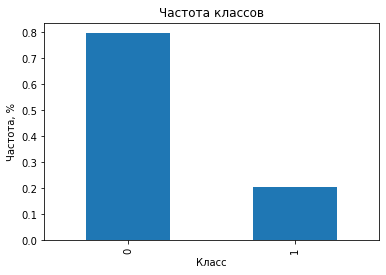

In [33]:
# построение диаграммы частоты классов
class_frequency.plot(kind='bar', xlabel='Класс', ylabel='Частота, %', title='Частота классов')

Попробуем обучить модель на несбалансированной выборке.

**Обучение модели без учета дисбаланса**

Поскольку в выборке присутствуют категориальные признаки, необходимо преобразовать их в численные при помощи **техники прямого кодирования OHE**. Но перед этим избавимся от столбцов с фамилиями и customer_id, которые не содержат полезной информации для обучения модели и последующего предсказания, но могут существенно увеличить вес датафрейма при преобразовании с помощью техники OHE.

In [34]:
# удаление колонок с фамилией и идентификатором клиента
df_ohe = df.drop(['surname','customer_id'], axis=1)

In [35]:
# преобразование категориальных признаков по полу клиента и стране обслуживания в количественные техникой OHE
df_ohe = pd.get_dummies(df_ohe, drop_first = True)

In [36]:
# вывод результата
df_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.000000,1,1,1,101348.882812,1,0,0,0
1,608,41,1.0,83807.859375,1,0,1,112542.578125,0,0,1,0
2,502,42,8.0,159660.796875,3,1,0,113931.570312,1,0,0,0
3,699,39,1.0,0.000000,2,0,0,93826.632812,0,0,0,0
4,850,43,2.0,125510.820312,1,1,1,79084.101562,0,0,1,0


In [37]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       9091 non-null   int32  
 1   age                9091 non-null   int32  
 2   tenure             9091 non-null   float32
 3   balance            9091 non-null   float32
 4   num_of_products    9091 non-null   int32  
 5   has_cr_card        9091 non-null   int32  
 6   is_active_member   9091 non-null   int32  
 7   estimated_salary   9091 non-null   float32
 8   exited             9091 non-null   int32  
 9   geography_Germany  9091 non-null   uint8  
 10  geography_Spain    9091 non-null   uint8  
 11  gender_Male        9091 non-null   uint8  
dtypes: float32(3), int32(6), uint8(3)
memory usage: 346.4 KB


Обработка техникой OHE прошла корректно.

В данном прокте у нас нет дополнительной тестовой выборки, поэтому для обучения и проверки модели разделим исходные данные на признаки и целевой признак для обучающей, валидационной и тестовой выборок в соотношении 3:1:1.

In [38]:
# разделение признаков и целевого признака на 3 выборки
features_train, features_tv, target_train, target_tv = train_test_split(
    df_ohe.drop(['exited'], axis=1), df_ohe['exited'], test_size=0.40, random_state = 12345 
)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_tv, target_tv, test_size=0.50, random_state = 12345 
)

Поскольку в данных присутствуют количественные признаки с разными разбросами значений, во избежание присвоения бОльшего веса 
признакам с бОльшими значениями и разбросом приведем признаки к одному масштабу с помощью **стандартизации данных**.

In [39]:
# код от предупреждения SettingWithCopy
pd.options.mode.chained_assignment = None
# формирование списка стобцов и создание структуры для стандартизации
numeric=['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
# настройка стандартизации на обучающих данных
scaler.fit(features_train[numeric]) 
# стандартизация выборок для обучения, валидации и тестирования
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Оценим размер получившихся выборок.

In [40]:
# вывод размера выборки
features_train.shape

(5454, 11)

In [41]:
# вывод размера выборки
target_train.shape

(5454,)

In [42]:
# вывод размера выборки
features_valid.shape

(1818, 11)

In [43]:
# вывод размера выборки
target_valid.shape

(1818,)

In [44]:
# вывод размера выборки
features_test.shape

(1819, 11)

In [45]:
# вывод размера выборки
target_test.shape

(1819,)

Выделение выборок прошло корректно.

**Модель Дерево решений**

Создадим цикл, который создаст и обучит модель на данных обучающей выборки, перебрав различные варианты глубины дерева решений от 1 до 10, и на основе максимального значения F1-score на данных валидационной выборки определит модель с оптимальной глубиной дерева.

In [46]:
# создание цикла для определения лучшей модели
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 11):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train, target_train)
    predictions_tree_valid = model_tree.predict(features_valid)
    result_tree_valid = f1_score(target_valid, predictions_tree_valid)
    if result_tree_valid > best_result:
        best_model = model_tree
        best_result = result_tree_valid
        best_depth = depth
        
print("F1-score:", best_result, "Глубина дерева:", best_depth)

F1-score: 0.5764331210191083 Глубина дерева: 7


**Модель Случайный лес**

Создадим цикл, который создаст и обучит модель на данных обучающей выборки, перебрав различные варианты количества оценщиков от 1 до 50, и на основе максимального значения F1-score на данных валидационной выборки определит модель с оптимальным количеством оценщиков.

In [47]:
# создание цикла для определения лучшей модели
best_model = None
best_result = 0
best_est = 0
for est in range(1, 51):
    model_forest = RandomForestClassifier(random_state=12345, n_estimators=est)
    model_forest.fit(features_train, target_train)
    predictions_forest_valid = model_forest.predict(features_valid)
    result_forest_valid = f1_score(target_valid, predictions_forest_valid)
    if result_forest_valid > best_result:
        best_model = model_forest
        best_result = result_forest_valid
        best_est = est

print("F1-score:", best_result, "Количество оценщиков:", best_est)

F1-score: 0.60625 Количество оценщиков: 13


**Модель логистической регрессии**

Создадим модель логистической регрессии и оценим точность ее предсказания.

In [48]:
# создание модели
model_regression = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)

In [49]:
# обучение модели на обучающей выборке и оценка F1-score на валидационной выборке
model_regression.fit(features_train, target_train)
predictions_regression_valid = model_regression.predict(features_valid)
result_regression_valid = f1_score(target_valid, predictions_regression_valid)
print("F1-score:", result_regression_valid)

F1-score: 0.30400000000000005


**Полнота и точность для модели "Случайный лес" при 13 оценщиках**

Оценим метрики качества прогнозирования для модели с лучшим результатом по F1- мере ("Случайный лес" при 13 оценщиках, 0.60625).

In [50]:
# прогнозирование модели и оценка метрик качества сделанного ею прогноза
model_forest = RandomForestClassifier(random_state=12345, n_estimators=13)
model_forest.fit(features_train, target_train)
predicted_valid = model_forest.predict(features_valid)
print('Полнота:', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))

Полнота: 0.5145888594164456
Точность: 0.7376425855513308


**ROC-кривая и метрика AUC-ROC**

Для оценки качества предсказаний также построим ROC-кривую, или кривую ошибок, и оценим площадь под ней (метрику AUC-ROC).

Для построения **ROC-кривой** вычислим вероятности положительных классов.

In [51]:
# вычисление вероятностей обоих классов
probabilities_valid = model_forest.predict_proba(features_valid)

In [52]:
# формирование Series с вероятностями только положительного класса
probabilities_one_valid = probabilities_valid[:, 1]
probabilities_one_valid

array([0.53846154, 0.        , 0.69230769, ..., 0.23076923, 0.15384615,
       0.38461538])

Построим график ROC-кривой.

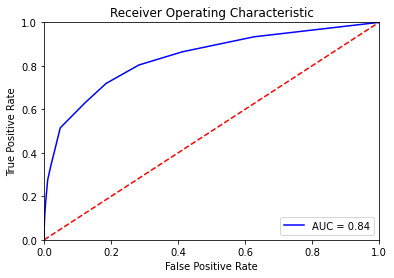

In [53]:
# расчет значений fpr, tpr, thresholds для построения кривой
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
# расчет значения AUC-ROC 
roc_auc = metrics.auc(fpr, tpr)
# построение ROC-кривой
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Значение метрики качества классификации **AUC-ROC** равно площади под ROC-кривой. Значения метрики изменяются от
0 до 1. AUC-ROC случайной модели равна 0.5

In [54]:
# вычисление площади под ROC-кривой
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.8378704738273045

Значение метрики AUC-ROC для нашей модели равно 0.84, что неплохо, но не достигает значения в 0.9.

<div style="border:solid blue 2px; padding: 20px"> 

**Вывод** 
    
Проведена оценка баланса классов в выборке: выборка несбалансированная, класс действующих клиентов в 4 раза больше класса ушедших клиентов.
    
Проведена работа с несбалансированной выборкой:

1. Произведено преобразование категориальных признаков, несущих полезную для работы модели информации, в численные с помощью техники OHE (колонки geography и gender).
    
2. Признаки и целевой признак разделены в пропорции 60% / 20% / 20% на обучающую, валидационную и тестовую выборки.
    
3. Проведено обучение на обучающей выборке и оценка F1-score на валидационной выборке для 3 моделей с различными гиперпараметрами (Решающее дерево, Случайный лес, Логистическая регрессия); наилучший результат показала модель Случайный лес с 13 оценщиками (F1-score 0.61).
    
4. Проведена оценка других метрик качества на валидационной выборке для этой модели: Полнота: 0.51, Точность: 0.74
    
5. Также для этой модели на валидационной выборке построена ROC-кривая и оценена метрика AUC-ROC (0.84).

 
</div>

## Борьба с дисбалансом

**Техника upsampling**

Проведем работу по обучению, выбору и оценке модели с учетом несбалансированности выборки. Для этого сбалансируем классы путём увеличения числа малочисленных признаков с помощью техники upsampling. Для проведения работ используем уже предобработанные выборки признаков и целевых признаков датасета df_ohe из предыдущего шага.

Разедлим обучающую выборку на отрицательные и положительные объекты.

In [55]:
# разделение признаков и целевого признака обучающей выборки на положительные и отрицательные объекты
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

Оценим размеры положительных и отрицательных классов в обучающей выборке.

In [56]:
# оценка размеров классов
display(features_zeros.shape)
display(features_ones.shape)
display(target_zeros.shape)
display(target_ones.shape)

(4328, 11)

(1126, 11)

(4328,)

(1126,)

Объектов класса "1" в 4 раза меньше, чем объектов класса "0". Исправим это увеличением объектов класса "1" в выборке.

Создадим функцию для увеличения класса в выборке и перемешивания получившегося результата.

In [57]:
# создание функции
def upsample(features, target, repeat):
    repeat = repeat
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    result = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return result

In [58]:
# применение функции к нашим выборкам
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [59]:
features_zeros

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
8483,0.809075,-1.039327,-1.025995,0.554904,-0.908179,1,0,0.019508,0,0,0
3431,-1.152518,-1.227561,0.696524,0.480609,-0.908179,0,0,0.056167,0,0,1
6770,-0.398853,0.090079,1.385532,-1.237830,-0.908179,1,1,0.848739,0,0,1
1350,-0.749875,-0.286389,0.352020,-1.237830,0.809300,1,1,-0.894953,0,0,1
4047,-1.028628,-0.756975,-0.336987,-1.237830,0.809300,0,1,-1.284516,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7709,-1.307381,0.184196,0.696524,-1.237830,0.809300,0,1,1.316608,0,0,0
546,-1.586134,-0.851092,1.730036,0.857870,-0.908179,0,0,1.247218,0,0,1
4478,1.283988,-0.474624,1.730036,0.813031,-0.908179,0,0,-1.092767,1,0,1
3492,-1.049276,-0.945210,0.352020,0.449165,-0.908179,1,1,-1.086965,0,0,0


Оценим размеры положительных и отрицательных классов в обучающей выборке после проведенного преобразования.

In [60]:
# разделение признаков и целевого признака преобразованной обучающей выборки на положительные и отрицательные объекты
features_upsampled_zeros = features_upsampled[target_upsampled == 0]
features_upsampled_ones = features_upsampled[target_upsampled == 1]
target_upsampled_zeros = target_upsampled[target_upsampled == 0]
target_upsampled_ones = target_upsampled[target_upsampled == 1]

In [61]:
# оценка размеров получившихся классов
display(features_upsampled_zeros.shape)
display(features_upsampled_ones.shape)
display(target_upsampled_zeros.shape)
display(target_upsampled_ones.shape)

(4328, 11)

(4504, 11)

(4328,)

(4504,)

Преобразование проведено успешно, новые выборки практически равны.

Проведем обучение и выбор модели с наибольшей accuracy на преобразованной выборке.

**Модель Дерево решений с upsampling**

Создадим цикл, который создаст и обучит модель на данных преобразованной обучающей выборки, перебрав различные варианты глубины дерева решений от 1 до 10, и на основе максимального значения F1-score на данных валидационной выборки определит модель с оптимальной глубиной дерева.

In [62]:
# создание цикла для определения лучшей модели
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 11):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_upsampled, target_upsampled)
    predictions_tree_valid = model_tree.predict(features_valid)
    result_tree_valid = f1_score(target_valid, predictions_tree_valid)
    if result_tree_valid > best_result:
        best_model = model_tree
        best_result = result_tree_valid
        best_depth = depth
        
print("F1-score:", best_result, "Глубина дерева:", best_depth)

F1-score: 0.5735449735449736 Глубина дерева: 5


**Модель Случайный лес с upsampling**

Создадим цикл, который создаст и обучит модель на данных преобразованной обучающей выборки, перебрав различные варианты количества оценщиков от 1 до 50, и на основе максимального значения F1-score на данных валидационной выборки определит модель с оптимальным количеством оценщиков.

In [63]:
# создание цикла для определения лучшей модели
best_model = None
best_result = 0
best_est = 0
for est in range(1, 51):
    model_forest = RandomForestClassifier(random_state=12345, n_estimators=est)
    model_forest.fit(features_upsampled, target_upsampled)
    predictions_forest_valid = model_forest.predict(features_valid)
    result_forest_valid = f1_score(target_valid, predictions_forest_valid)
    if result_forest_valid > best_result:
        best_model = model_forest
        best_result = result_forest_valid
        best_est = est

print("F1-score:", best_result, "Количество оценщиков:", best_est)

F1-score: 0.6142649199417758 Количество оценщиков: 47


**Модель логистической регрессии с upsampling**

Создадим модель логистической регрессии и оценим точность ее предсказания.

In [64]:
# создание модели
model_regression = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)

In [65]:
# обучение модели на преобразованной обучающей выборке и оценка F1-score на валидационной выборке
model_regression.fit(features_train, target_train)
predictions_regression_valid = model_regression.predict(features_valid)
result_regression_valid = f1_score(target_valid, predictions_regression_valid)
print("F1-score:", result_regression_valid)

F1-score: 0.30400000000000005


**Полнота и  точность для модели с наибольшим значением F1-score после upsampling - "Случайный лес" при 47 оценщиках**

Оценим метрики качества прогнозирования для модели с лучшим результатом по F1-score ("Случайный лес" при 47 оценщиках, 0.61).

In [66]:
# прогнозирование модели и оценка метрик качества сделанного ею прогноза
model_forest = RandomForestClassifier(random_state=12345, n_estimators=47)
model_forest.fit(features_upsampled, target_upsampled)
predicted_valid = model_forest.predict(features_valid)
print('Полнота:', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))

Полнота: 0.5596816976127321
Точность: 0.6806451612903226


**Взвешивание классов**

Попробуем применить взвешивание классов в качестве инструмента балансировки выборки и обучить модели с его учетом.

**Модель Дерево решений со взвешиванием**

In [67]:
# создание цикла для определения лучшей модели со взвешиванием классов
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 11):
    model_tree_w = DecisionTreeClassifier(class_weight='balanced', random_state=12345, max_depth=depth)
    model_tree_w.fit(features_train, target_train)
    predictions_tree_valid = model_tree_w.predict(features_valid)
    result_tree_valid = f1_score(target_valid, predictions_tree_valid)
    if result_tree_valid > best_result:
        best_model = model_tree
        best_result = result_tree_valid
        best_depth = depth
        
print("F1-score:", best_result, "Глубина дерева:", best_depth)

F1-score: 0.5735449735449736 Глубина дерева: 5


**Модель Случайный лес со взвешиванием**

In [68]:
# создание цикла для определения лучшей модели со взвешиванием классов
best_model = None
best_result = 0
best_est = 0
for est in range(1, 51):
    model_forest_w = RandomForestClassifier(class_weight='balanced', random_state=12345, n_estimators=est)
    model_forest_w.fit(features_train, target_train)
    predictions_forest_valid = model_forest_w.predict(features_valid)
    result_forest_valid = f1_score(target_valid, predictions_forest_valid)
    if result_forest_valid > best_result:
        best_model = model_forest
        best_result = result_forest_valid
        best_est = est

print("F1-score:", best_result, "Количество оценщиков:", best_est)

F1-score: 0.5790349417637272 Количество оценщиков: 47


**Модель логистической регрессии со взвешиванием**

In [69]:
# создание модели со взвешиванием классов
model_regression_w = LogisticRegression(class_weight='balanced', random_state=12345, solver='lbfgs', max_iter=1000)

In [70]:
# обучение модели на обучающей выборке и оценка F1-score на валидационной выборке
model_regression_w.fit(features_train, target_train)
predictions_regression_valid = model_regression_w.predict(features_valid)
result_regression_valid = f1_score(target_valid, predictions_regression_valid)
print("F1-score:", result_regression_valid)

F1-score: 0.509731232622799


**Полнота и точность для модели с наибольшим значением F1-score после взвешивания классов - "Случайный лес" при 47 оценщиках**

In [71]:
# прогнозирование модели и оценка метрик качества сделанного ею прогноза
model_forest_w = RandomForestClassifier(class_weight='balanced', random_state=12345, n_estimators=47)
model_forest_w.fit(features_train, target_train)
predicted_valid = model_forest_w.predict(features_valid)
print('Полнота:', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))

Полнота: 0.46153846153846156
Точность: 0.7767857142857143


Метрики качества модели "Случайный лес" после обучения на преобразованной выборке изменились:

|Метрика  |Несбалансир. выборка, 13 оценщиков|Upsampling, 47 оценщиков|Взвешивание, 47 оценщиков|
|:-------:|---------------------------------:|-----------------------:|------------------------:|
|F1-мера  |0.606                             |0.614                   |0.579                    |
|Полнота  |0.514                             |0.559                   |0.461                    | 
|Точность |0.738                             |0.680                   |0.777                    |



Наилучший результат по F1-мере модель Случайный лес показывает на сбалансированной с помощью upsampling выборке.

**ROC-кривая и метрика AUC-ROC для модели Случайный лес на сбалансированной с помощью upsampling выборке**

Для оценки качества предсказаний модели, обученной на сбалансированной выборке, также построим ROC-кривую, или кривую ошибок, и оценим площадь под ней (метрику AUC-ROC).

In [72]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=47)
model_forest.fit(features_upsampled, target_upsampled)
predicted_valid = model_forest.predict(features_valid)

Для построения ROC-кривой вычислим вероятности положительных классов.

In [73]:
# вычисление вероятностей обоих классов
probabilities_valid = model_forest.predict_proba(features_valid)

In [74]:
# формирование Series с вероятностями только положительного класса
probabilities_one_valid = probabilities_valid[:, 1]
probabilities_one_valid

array([0.68085106, 0.14893617, 0.76595745, ..., 0.19148936, 0.08510638,
       0.82978723])

Построим график ROC-кривой.

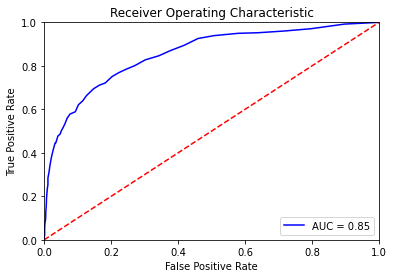

In [75]:
# расчет значений fpr, tpr, thresholds для построения кривой
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
# расчет значения AUC-ROC 
roc_auc = metrics.auc(fpr, tpr)
# построение ROC-кривой
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Значение метрики качества классификации AUC-ROC равно площади под ROC-кривой. Значения метрики изменяются от 0 до 1. AUC-ROC случайной модели равна 0.5

In [76]:
# вычисление площади под ROC-кривой
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.8545476634447416

Значение метрики AUC-ROC для нашей модели на сбалансированной с помощью upsampling выборке изменилось с 0.838 до 0.854 (рост на 0,016 за счет обучения на сбалансированной выборке).

<div style="border:solid blue 2px; padding: 20px"> 

**Вывод** 
    
Проведена работа со сбалансированной выборкой:
    
**Техника upsampling**

1. Для повышения качества обучения сбалансирована обучающая выборка:
с помощью техники upsampling количество положительных и отрицательных объектов сделано примерно одинаковым (чуть более 4000 объектов каждого класса)

2. Проведено обучение на сбалансированной обучающей выборке и оценка F1-score на валидационной выборке для 3 моделей с различными гиперпараметрами (Решающее дерево, Случайный лес, Логистическая регрессия); наилучший результат показала модель Случайный лес с 47 оценщиками (F1-score 0.614).

3. Проведена оценка других метрик качества на валидационной выборке для этой модели, обученной на сбалансированной выборке по сравнению с несбалансированной: полнота выросла на 0.045, точность снизилась на 0.058, F1-мера выросла на 0.008. Если ориентироваться на F1-меру как на основной параметр качества, можно сделать вывод о том, что обучение на сбалансированной с помощью upsampling выборке позволило улучшить модель и качество ее прогноза.

 
**Взвешивание классов**

1. Для повышения качества обучения сбалансирована обучающая выборка с помощью взвешивания классов

2. Проведено обучение на сбалансированной обучающей выборке и оценка F1-score на валидационной выборке для 3 моделей с различными гиперпараметрами (Решающее дерево, Случайный лес, Логистическая регрессия); наилучший результат показала модель Случайный лес с 47 оценщиками (F1-score 0.579, что на 0.035 хуже, чем при балансировании с помощью upsampling).

3. Проведена оценка других метрик качества на валидационной выборке для этой модели, обученной на сбалансированной с помощью взвешивания выборке: полнота снизилась 0.053 по сравнению с несбалансированной выборкой, точность на 0.039 выше, чем на несбалансированной выборке.

Для дальнейшей оценки выбрана модель с наилучшим значением F1-меры - модель Случайный лес с 47 оценщиками, обученная на выборке, сбалансированной с помощью техники upsampling. Для нее построена ROC-кривая и оценена метрика AUC-ROC (после обучения на сбалансированной выборке метрика изменилась с 0.838 до 0.854, показав рост на 0.016).
</div>

## Тестирование модели

Проведем финальное тестирование на данных тестовой выборки выбранной и обученной на сбалансированной с помощью upsampling выборке модели Случайный лес с 47 оценщиками.

**Accuracy, полнота, точность, F1-мера для модели "Случайный лес", обученной на сбалансированной выборке, на данных тестовой выборки**

In [77]:
# прогнозирование модели Случайный лес с 47 оценщиками и оценка метрик качества сделанного ею прогноза
model_forest = RandomForestClassifier(random_state=12345, n_estimators=47)
model_forest.fit(features_upsampled, target_upsampled)
predicted_test = model_forest.predict(features_test)
print('Accuracy:', accuracy_score(target_test, predicted_test))
print('Полнота:', recall_score(target_test, predicted_test))
print('Точность:', precision_score(target_test, predicted_test))
print('F1-мера:',f1_score(target_test, predicted_test))

Accuracy: 0.8565145684442002
Полнота: 0.5498575498575499
Точность: 0.652027027027027
F1-мера: 0.5965996908809892


Значение F1-меры отвечает требованиям исследования и равно 0.596.

**ROC-кривая и метрика AUC-ROC для модели "Случайный лес", обученной на сбалансированной выборке, на данных тестовой выборки**

Для оценки качества предсказаний модели, обученной на сбалансированной выборке, также построим ROC-кривую, или кривую ошибок, и оценим площадь под ней (метрику AUC-ROC).

Для построения ROC-кривой вычислим вероятности положительных классов в тестовой выборке.

In [78]:
# вычисление вероятностей обоих классов
probabilities_test = model_forest.predict_proba(features_test)

In [79]:
# формирование Series с вероятностями только положительного класса
probabilities_one_test = probabilities_test[:, 1]
probabilities_one_test

array([0.04255319, 0.17021277, 0.12765957, ..., 0.78723404, 0.4893617 ,
       0.        ])

Построим график ROC-кривой.

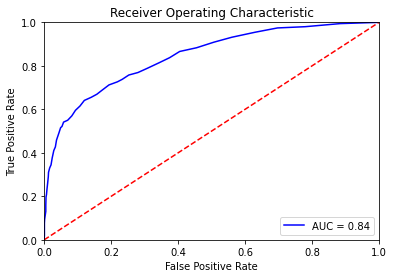

In [80]:
# расчет значений fpr, tpr, thresholds для построения кривой
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
# расчет значения AUC-ROC 
roc_auc = metrics.auc(fpr, tpr)
# построение ROC-кривой
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
# вычисление площади под ROC-кривой
auc_roc = roc_auc_score(target_test, probabilities_one_test)
auc_roc

0.8431127102789228

Значение метрики AUC-ROC для нашей модели на тестовых данных снизилось с 0,854 (на валидационной выборке после применения upsampling) и составило 0.843. Можно предположить, что имеет место некоторое переобучение модели.

<div style="border:solid blue 2px; padding: 20px"> 

**Вывод** 
    
На данных тестовой выборки проведено тестирование модели Случайный лес с 47 оценщиками, обученной на выборке, сбалансированной при помощи техники upsampling и отобранной по результатам предыдущих шагов. Модель показала значение F1-меры = 0.596, что выше требующихся по условиям исследования 0.59.

 
</div>

## Общий вывод

<div style="border:solid blue 2px; padding: 20px"> 

**Вывод** 

В рамках работ по проекту были осуществлены следующие действия:
1. Изучен датафрейм, произведена предобработка данных (удалены пропуски и лишние колонки), осуществлена проверка на дубли, проведено  переименование колонок, проверены данные в колонках на адекватность.
2. Исследованы классы и определено, что выборка несбалансированная
3. Проведена обработка категориальных признаков в численные при помощи техники прямого кодирования OHE
4. Проведено разделение выборки на обучающую, валидационную и тестовую (60% / 20% / 20%)
5. Обучены и проверены на валидационной выборке модели Решающее дерево, Случайный лес и Логистическая регрессия.
Наилучшие результаты показала модель Случайный лес с 47 оценщиками (полнота 0.514, точность 0.738, F1-мера 0.606, auc-roc 0.838)
6. Для балансирования классов применены 2 техники: upsampling с увеличением числа низкочастотного класса и взвешивание классов.
7. По итогам сравнения качественных метрик наилучшее значение F1-меры (0.614) показала модель Случайный лес с 47 оценщиками, обученная на выборке, сбалансированной с помощью upsampling.
Метрика auc-roc для нее показала значение 0.854
8. В результате итогового тестирования на тестовой выборке выбранная модель Случайный лес с 47 оценщиками показала значение F1-меры = 0.596. 
Метрика auc-roc при этом показала значение 0.843. Можно считать данный результат соответствующим цели исследования.

 
</div>